<a href="https://colab.research.google.com/github/jordano-crt/TelecomX-Challenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Comenzamos, cargando los datos de los links de github provisto para manipulación

In [43]:
import pandas as pd
import requests
import json

In [44]:
URL = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'


In [45]:
response = requests.get(URL)
datos = response.json()
dataFrame_datos = pd.DataFrame(datos)

#🔧 Transformación

### Conociendo la estructura del dataset

El conjunto de datos esta subido a un archivo de tipo json, los cuales son un conjunto de diccionarios, listas o arrays, los cuales pueden estar anidados entres los datos. Como se muestra a continuación.

In [46]:
dataFrame_datos.sample(5)# se debe normalizar

,customerID,Churn,customer,phone,internet,account
6659,9150-KPBJQ,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
4048,5542-DHSXL,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6086,8316-BBQAY,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
3648,5027-XWQHA,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6174,8455-HIRAQ,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Como se observa en *dataFrame_datos.sample(5)*, no estrega 5 ejemplos aleatorios de DataFrame de pandas. Se vizualizan 6 columnas de las cuales 4 desde 'customer' a 'account' son objetos de tipo diccionario, los cuales debemos descomponer es culumnas separadas. Para ello se utilizar *pd.json_normalize()*

In [47]:
datos_nomalizados = pd.json_normalize(datos)

Podemos visualizar la cantidad de filas y columnas que contiene nuestro conjunto de datos con *datos_normalizados.shape*. Que nos muestra un total de 7267 filas con 21 columnas.

In [48]:
datos_nomalizados.shape

(7267, 21)

In [49]:
datos_nomalizados.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1696,2403-BCASL,Yes,Male,1,Yes,Yes,41,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,4534.9
941,1328-EUZHC,No,Female,0,Yes,No,18,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,370.5
5343,7296-PIXQY,No,Female,0,Yes,Yes,14,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,70.20,1046.5
4287,5895-QSXOD,No,Male,0,No,No,9,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,70.05,657.5
6744,9294-TDIPC,No,Male,0,No,Yes,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,83.75


Gracias a la normalización, se puede apreciar todas las columnas que esta relacionadas con los clientes, de forma más comprensible. Ahora se mostrara una descripcion del DataFrame con *datos_nomalizados.info()*.

In [50]:
datos_nomalizados.info()# como son los datos en el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Limpieza de datos

Se observa que **account.Charges.Total** esta en otro formato, asi que lo debemos cambiar el tipo de dato a float.

In [51]:
# Corrige espacios en blanco y convierte a float, reemplazando errores con NaN
datos_nomalizados['account.Charges.Total'] = pd.to_numeric(
    datos_nomalizados['account.Charges.Total'], errors='coerce'
)

In [52]:
datos_nomalizados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Antes de proseguir se debe verificar si hay valores nulos dentro de los datos.O caracteres que no debirian de estar.

In [53]:
datos_nomalizados['account.Charges.Total'].isnull().sum()

np.int64(11)

In [54]:
for datos in datos_nomalizados.columns:
    print(datos, datos_nomalizados[datos].isnull().sum())
print(datos_nomalizados.shape)

customerID 0
Churn 0
customer.gender 0
customer.SeniorCitizen 0
customer.Partner 0
customer.Dependents 0
customer.tenure 0
phone.PhoneService 0
phone.MultipleLines 0
internet.InternetService 0
internet.OnlineSecurity 0
internet.OnlineBackup 0
internet.DeviceProtection 0
internet.TechSupport 0
internet.StreamingTV 0
internet.StreamingMovies 0
account.Contract 0
account.PaperlessBilling 0
account.PaymentMethod 0
account.Charges.Monthly 0
account.Charges.Total 11
(7267, 21)


In [55]:
for columna in datos_nomalizados.columns:
    print(f"\n🔹 Columna: {columna}")
    print(f"   🔸 Cantidad de valores únicos: {datos_nomalizados[columna].nunique()}")
    print(f"   🔸 Valores únicos: {datos_nomalizados[columna].unique()[:10]}")
    #if datos_nomalizados[columna].nunique() > 10:
    #    print("   ⚠️  (Mostrando solo los 10 primeros)")



🔹 Columna: customerID
   🔸 Cantidad de valores únicos: 7267
   🔸 Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']

🔹 Columna: Churn
   🔸 Cantidad de valores únicos: 3
   🔸 Valores únicos: ['No' 'Yes' '']

🔹 Columna: customer.gender
   🔸 Cantidad de valores únicos: 2
   🔸 Valores únicos: ['Female' 'Male']

🔹 Columna: customer.SeniorCitizen
   🔸 Cantidad de valores únicos: 2
   🔸 Valores únicos: [0 1]

🔹 Columna: customer.Partner
   🔸 Cantidad de valores únicos: 2
   🔸 Valores únicos: ['Yes' 'No']

🔹 Columna: customer.Dependents
   🔸 Cantidad de valores únicos: 2
   🔸 Valores únicos: ['Yes' 'No']

🔹 Columna: customer.tenure
   🔸 Cantidad de valores únicos: 73
   🔸 Valores únicos: [ 9  4 13  3 71 63  7 65 54 72]

🔹 Columna: phone.PhoneService
   🔸 Cantidad de valores únicos: 2
   🔸 Valores únicos: ['Yes' 'No']

🔹 Columna: phone.MultipleLines
   🔸 Cantidad de valores únicos: 3
   🔸 Valores 

Como se puede apreciar, siguiendo el orden de las columnas del dataFrame, la segunda corresponde a 'churn', que son los datos de las personas que ya no estan en la empresa, y resulta que hay otra opcion que es un espacio vacio, que es distinto de null. Ademas de la columna 'account.Charges.Total', que tiene valores nulos.

In [56]:
datos_nomalizados[datos_nomalizados['Churn'] == ''].shape

(224, 21)

In [57]:
datos_nomalizados[datos_nomalizados['Churn'] == ''].sample(3) # ejemplo de 3 datos que contienen valora '' en churn

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4599,6303-APKJD,,Male,1,Yes,No,57,Yes,Yes,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.85,4925.35
3900,5332-UJJBL,,Male,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.00,73.45
842,1195-UQFHQ,,Male,0,No,No,61,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,No,Electronic check,104.00,6363.45


In [58]:
datos_nomalizados[datos_nomalizados['account.Charges.Total'].isnull()].index # Indice de los datos que tiene valor nulo

Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [59]:
datos_nomalizados = datos_nomalizados[datos_nomalizados['Churn'] != ''] # dejame solo los datos que sean distinto de ''

In [60]:
datos_nomalizados[datos_nomalizados['Churn'] == ''].shape

(0, 21)

In [61]:
datos_nomalizados.shape

(7043, 21)

In [62]:
datos_nomalizados = datos_nomalizados[~datos_nomalizados['account.Charges.Total'].isnull()]


In [63]:
datos_nomalizados['account.Charges.Total'].isnull().sum()

np.int64(0)

In [64]:
datos_nomalizados.shape

(7032, 21)

### Columna de cuentas diarias

Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [65]:
# Crear la columna 'Cuentas_Diarias' a partir de la facturación mensual
datos_nomalizados['Cuentas_Diarias'] = datos_nomalizados['account.Charges.Monthly'] / 30


In [66]:
datos_nomalizados[['account.Charges.Monthly', 'Cuentas_Diarias']].sample(5)

,account.Charges.Monthly,Cuentas_Diarias
2222,20.00,0.666667
222,69.95,2.331667
5069,20.90,0.696667
5201,99.40,3.313333
1290,65.05,2.168333


### Estandarizacion y transfomación de datos

La información se estandarizara para una mayor cosistencia, comprensibilidad y adecuada para análisis. Por ejemplo se convertiran valores textuales como 'yes' y 'no' , a valores binario 0 y 1.

In [67]:
datos_nomalizados['Churn'] = datos_nomalizados['Churn'].map({'Yes': 1, 'No': 0})
datos_nomalizados['Churn'].sample(5)

,Churn
3832,0
3875,0
3470,1
5564,0
6691,1


In [68]:
binarias = [
    'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'account.PaperlessBilling'
]

for col in binarias:
    datos_nomalizados[col] = datos_nomalizados[col].map({'Yes': 1, 'No': 0})


In [69]:
tres_opciones_phone = ['phone.MultipleLines']
tres_opciones_internet = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]

# Teléfono (no phone service)
for col in tres_opciones_phone:
    datos_nomalizados[col] = datos_nomalizados[col].map({
        'Yes': 1, 'No': 0, 'No phone service': 2
    })

# Internet (no internet service)
for col in tres_opciones_internet:
    datos_nomalizados[col] = datos_nomalizados[col].map({
        'Yes': 1, 'No': 0, 'No internet service': 2
    })


In [79]:
datos_nomalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  internet.TechSupport       7032 non-null   int64  
 1

### Columnas relevantes

Luego de corregir ciertos datos, ahora se pasara a escoger los valores, necesarios para llevar a cabo nuestro análisis de evasión. Se seleccionarán únicamente aquellas columnas que aporten información relevante para explicar y predecir el fenómeno de cancelación de clientes (Churn).

Este filtrado de columnas permitirá reducir el ruido en los datos, mejorar la eficiencia del análisis y concentrar el estudio en factores clave como el tipo de contrato, los servicios adicionales contratados, los métodos de pago, la antigüedad del cliente y los patrones de facturación mensual y total.

La selección final de variables se ha realizado considerando tanto el conocimiento del negocio como el análisis exploratorio preliminar, garantizando que las variables elegidas tengan una relación potencial con el comportamiento de abandono de los clientes.


**Churn**: indica si el cliente canceló (1) o permaneció (0).

**customer.tenure**: Meses que el cliente lleva en la empresa; la antigüedad influye en la probabilidad de churn.

**customer.SeniorCitizen**: Segmento etario que puede presentar patrones de retención distintos.

**customer.Partner**: Clientes con pareja suelen mostrar mayor estabilidad contractual.

**customer.Dependents**: Tener dependientes puede indicar mayor necesidad de estabilidad en servicios.

**internet.InternetService**: Tipo de conexión contratada, que influye en costos y satisfacción.

**internet.OnlineSecurity**: Servicio adicional que puede aumentar la permanencia.

**internet.TechSupport**: Acceso a soporte técnico rápido, reduce insatisfacción.

**account.Contract**: Contratos de mayor plazo suelen reducir el churn por penalizaciones o fidelización.

**account.PaperlessBilling**: Facturación electrónica puede estar asociada a diferentes hábitos de pago.

**account.PaymentMethod**: Algunos métodos de pago facilitan la retención (ej. débito automático).

**account.Charges.Monthly**: Monto mensual pagado; valores altos pueden aumentar la probabilidad de churn.

**account.Charges.Total**: Total pagado históricamente; útil para entender antigüedad y valor del cliente.

**Cuentas\_Diarias**: Gasto diario promedio, para un análisis más granular del comportamiento del cliente.


In [70]:
# Lista de variables seleccionadas
columnas_seleccionadas = [
    'Churn',  # Variable objetivo
    'customer.tenure',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'internet.InternetService',# ver caso
    'internet.OnlineSecurity',
    'internet.TechSupport',
    'account.Contract',# ver caso
    'account.PaperlessBilling',
    'account.PaymentMethod',# ver caso
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Cuentas_Diarias'
]

# Filtrar el DataFrame
datos_selec = datos_nomalizados[columnas_seleccionadas]

# Verificar resultado
datos_selec.sample(5)

,Churn,customer.tenure,customer.SeniorCitizen,customer.Partner,customer.Dependents,internet.InternetService,internet.OnlineSecurity,internet.TechSupport,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
6495,0,42,0,1,1,No,2,2,Two year,0,Mailed check,19.35,867.30,0.645000
125,0,22,0,0,0,DSL,0,0,Month-to-month,1,Electronic check,50.35,1098.85,1.678333
6067,0,70,0,1,0,No,2,2,Two year,0,Credit card (automatic),19.85,1328.35,0.661667
5910,0,24,1,1,0,DSL,0,1,Month-to-month,0,Mailed check,34.25,828.20,1.141667
1452,0,1,0,0,0,No,2,2,Month-to-month,1,Mailed check,20.25,20.25,0.675000


#📊 Carga y análisis

Para carga y análisis se usaran, las bibliotecas matplotlib y seaborn.

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
datos_selec.describe()

,Churn,customer.tenure,customer.SeniorCitizen,customer.Partner,customer.Dependents,internet.OnlineSecurity,internet.TechSupport,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,32.421786,0.162400,0.482509,0.298493,0.718857,0.722412,0.592719,64.798208,2283.300441,2.159940
std,0.441782,24.545260,0.368844,0.499729,0.457629,0.796556,0.795571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,55.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,3.958333


### Análisis de la tabla datos_selec

El conjunto de datos final contiene 7.032 registros de clientes con las variables seleccionadas para el análisis de evasión (Churn).

Churn: el 26,6% de los clientes han cancelado su servicio, lo que indica un problema de retención importante.<br>

Antigüedad (tenure): los clientes tienen entre 1 y 72 meses de contrato, con una mediana de 29 meses. Esto sugiere que la mitad de la base lleva menos de 2 años y medio en la compañía.<br>

SeniorCitizen: solo el 16% de los clientes tienen 65 años o más.<br>

Partner y Dependents: el 48% tiene pareja y el 29% tiene dependientes, lo que puede influir en la estabilidad contractual.<br>

Servicios adicionales: la mayoría de clientes no cuenta con servicios como seguridad en línea o soporte técnico, o bien no aplican porque no tienen servicio de internet.<br>

Facturación: Cargos mensuales: promedio de 64,8 con un rango de 18,25 a 118,75.<br>

Cargos totales: promedio de 2.283,3 pero con gran variabilidad, dado que dependen del tiempo que el cliente lleva en la empresa.<br>

Cuentas diarias (columna derivada): gasto promedio de 2,16 por día.<br>

Este análisis preliminar permite identificar patrones iniciales y preparar la base para el análisis exploratorio más profundo.<br>

### distribución de evación

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [74]:
total = len(datos_selec)

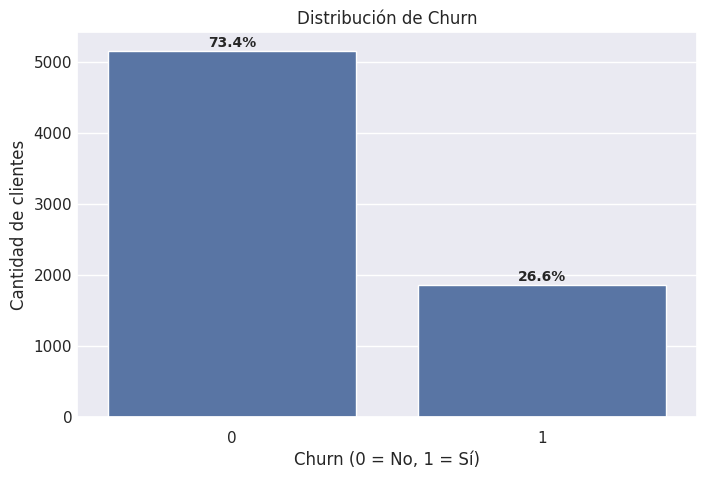

In [75]:
fig, ax = plt.subplots(figsize = (8,5))

ax.tick_params(axis ='y', which='both', size= 0)
sns.countplot(x='Churn', data=datos_selec, ax=ax)

ax.set_xlabel('Churn (0 = No, 1 = Sí)')
ax.set_ylabel('Cantidad de clientes')
ax.set_title('Distribución de Churn')

# Agregar porcentajes
for p in ax.patches:
    height = p.get_height()
    porcentaje = f'{100 * height / total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2, height + 50, porcentaje,
            ha='center', fontsize=10, fontweight='bold')


plt.show()

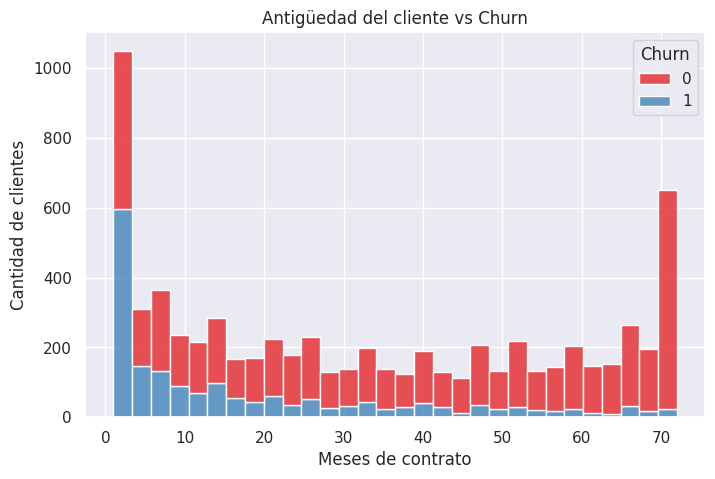

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(data=datos_selec, x='customer.tenure', hue='Churn', multiple='stack', bins=30, palette='Set1')
plt.title('Antigüedad del cliente vs Churn')
plt.xlabel('Meses de contrato')
plt.ylabel('Cantidad de clientes')
plt.show()


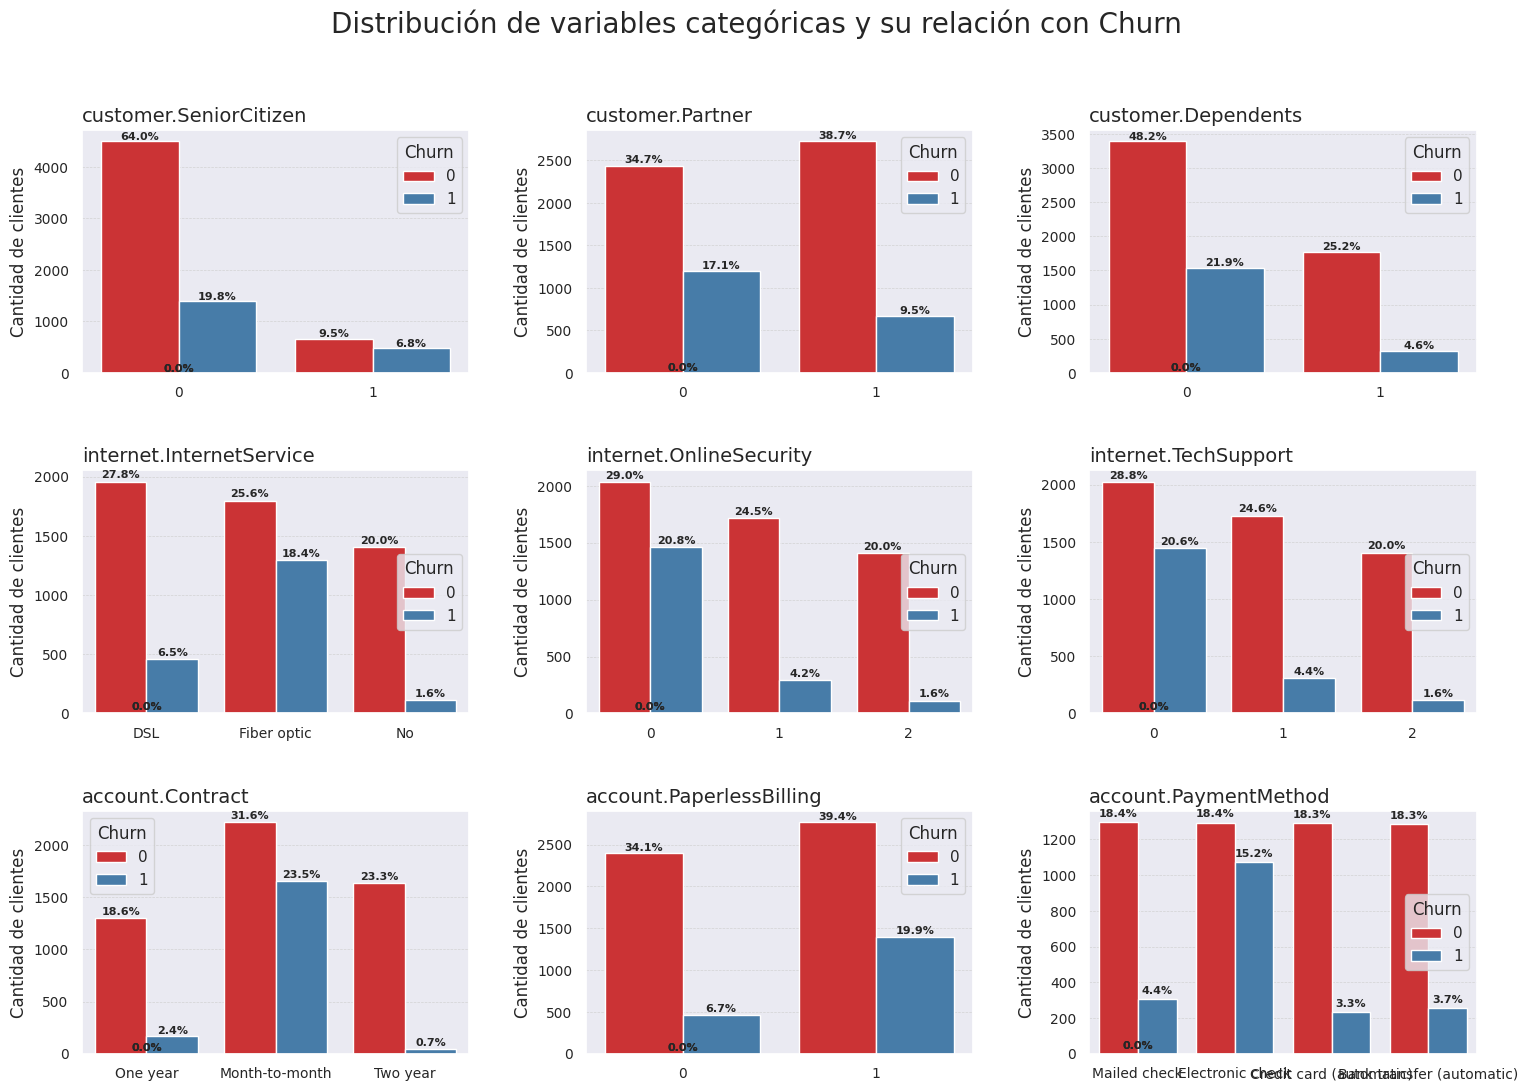

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas a graficar (excepto Churn)
variables_categoricas = [
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.TechSupport',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# Crear figura y subplots (3 filas x 3 columnas)
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Título general
fig.suptitle('Distribución de variables categóricas y su relación con Churn', fontsize=20)

# Colores para las barras
colores = ['darkviolet', 'green', 'darkblue', 'coral', 'gold', 'teal', 'red', 'purple', 'orange']

# Graficar cada variable en un subplot
for i, ax in enumerate(axs.flat):
    if i < len(variables_categoricas):
        var = variables_categoricas[i]
        sns.countplot(x=var, hue='Churn', data=datos_selec, palette='Set1', ax=ax)
        ax.set_title(var, loc='left', fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('Cantidad de clientes', fontsize=12)
        ax.tick_params(labelsize=10)
        ax.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.5)

        # Agregar porcentajes encima de las barras
        total = len(datos_selec)
        for p in ax.patches:
            height = p.get_height()
            porcentaje = f'{100 * height / total:.1f}%'
            ax.text(p.get_x() + p.get_width()/2, height + 30, porcentaje,
                    ha='center', fontsize=8, fontweight='bold')

# Mostrar
plt.show()


/tmp/ipython-input-4007534154.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=datos_selec, palette='Set2', ax=ax)
/tmp/ipython-input-4007534154.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=datos_selec, palette='Set2', ax=ax)
/tmp/ipython-input-4007534154.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=datos_selec, palette='Set2', ax=ax)
/tmp/ipython-input-4007534154.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

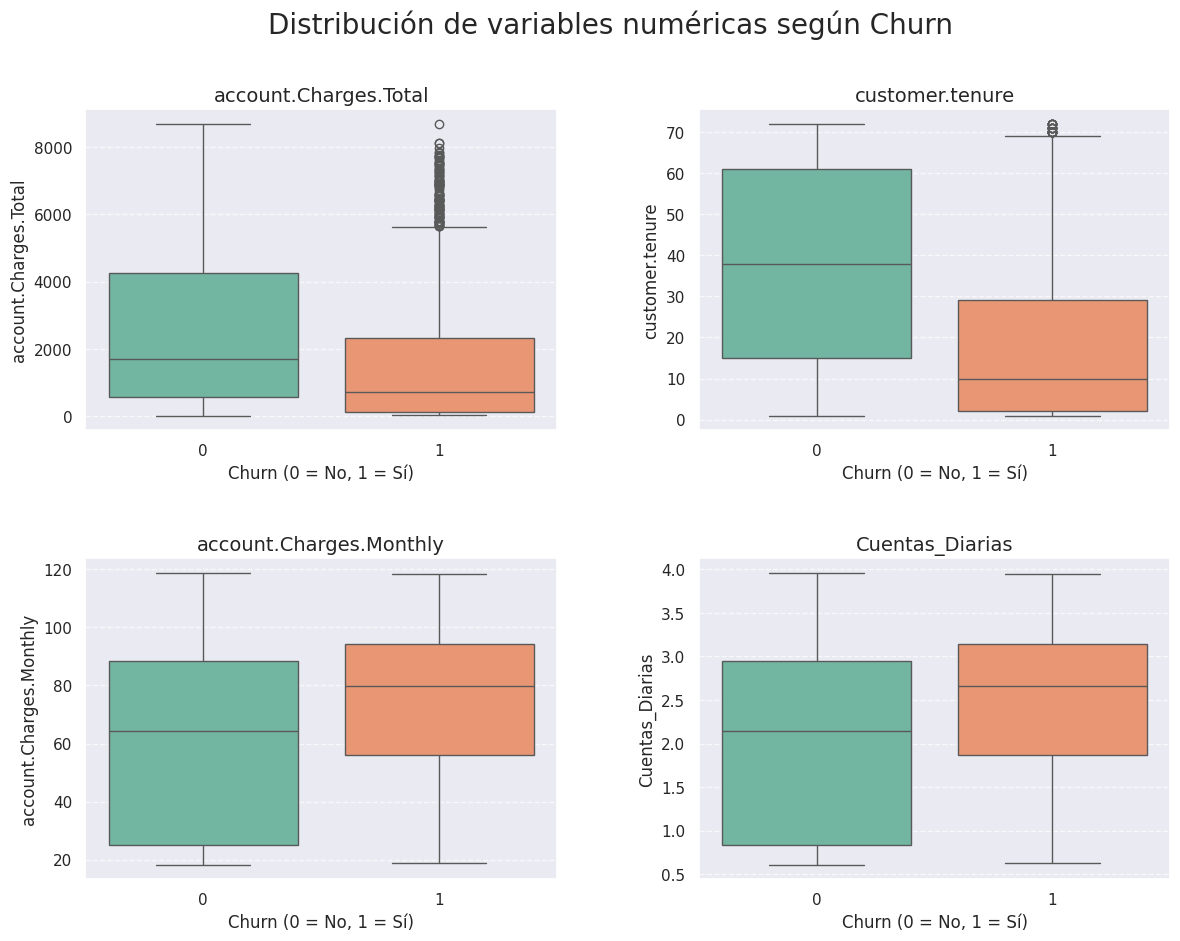

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas relevantes
variables_numericas = [
    'account.Charges.Total',
    'customer.tenure',
    'account.Charges.Monthly',
    'Cuentas_Diarias'
]

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

fig.suptitle('Distribución de variables numéricas según Churn', fontsize=20)

for i, ax in enumerate(axs.flat):
    if i < len(variables_numericas):
        var = variables_numericas[i]
        sns.boxplot(x='Churn', y=var, data=datos_selec, palette='Set2', ax=ax)
        ax.set_title(var, fontsize=14)
        ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=12)
        ax.set_ylabel(var, fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#📄Informe final

1. **Introducción**
El presente análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (Churn) en la empresa Telecom X.
El Churn, en este contexto, representa a los clientes que han cancelado su servicio. La alta tasa de cancelaciones afecta directamente los ingresos y la estabilidad del negocio, por lo que identificar patrones y causas es clave para desarrollar estrategias de retención.<br>

2. **Limpieza y Tratamiento de Datos**<br>
Se importaron los datos desde el repositorio de GitHub en formato JSON.<br>

Se normalizó la estructura, ya que varias columnas contenían diccionarios anidados (por ejemplo, customer, phone, internet, account).

Se verificaron y trataron valores nulos, reemplazando en algunos casos por 0 y en otros eliminando registros.

Se convirtieron variables categóricas Yes/No a formato binario (1 y 0) y se codificaron categorías con más de dos valores.

Se creó la columna Cuentas_Diarias, dividiendo la facturación mensual entre 30 para obtener un indicador más granular del gasto diario de los clientes.

3. **Análisis Exploratorio de Datos (EDA)**<br>
3.1 Distribución de Churn
El 26,6% de los clientes han cancelado sus servicios, mientras que el 73,4% permanecen activos. Esto indica que aproximadamente 1 de cada 4 clientes se va.

(Gráfico de Distribución de Churn)

3.2 **Variables Categóricas**
Los clientes sin pareja o sin dependientes muestran mayores tasas de cancelación.

Aquellos que no cuentan con servicios adicionales como seguridad en línea o soporte técnico tienen más probabilidad de irse.

El tipo de contrato es determinante: los clientes con contrato mensual presentan la tasa más alta de churn.

El método de pago Electronic check está asociado a mayor cancelación.

(Gráficos de variables categóricas)

3.3 **Variables Numéricas**<br>
Tenure (meses de contrato): clientes que cancelan tienen en promedio menor tiempo de permanencia.

Cargos mensuales: clientes con cargos mensuales más altos tienen una ligera tendencia a cancelar más.

Cargos totales: los clientes que se van tienden a haber gastado menos en total, lo que refuerza la idea de que se van pronto.

Cuentas Diarias: se observa un leve aumento en los clientes que cancelan.

(Gráficos de variables numéricas)

4. **Conclusiones e Insights**<br>
El contrato mensual es el mayor predictor de evasión.

La falta de servicios adicionales (seguridad, soporte) aumenta la probabilidad de churn.

Los clientes nuevos (bajo tenure) y con facturación mensual alta son más propensos a cancelar.

El método de pago Electronic check concentra una alta proporción de clientes que se van.

5. **Recomendaciones**<br>
Fomentar contratos a largo plazo con beneficios y descuentos para reducir la cancelación temprana.

Ofrecer paquetes con servicios adicionales (seguridad, soporte) incluidos o a bajo costo.

Implementar programas de fidelización para clientes nuevos, especialmente durante los primeros 6 meses.

Analizar la experiencia de clientes que usan Electronic check y evaluar incentivos para cambiar de método de pago.

Realizar campañas de retención proactivas a clientes con alto cargo mensual y poco tiempo en la empresa.

